In [6]:
import pandas as pd
import json


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [7]:
input_file = 'Pet_Supplies_5.json'

In [8]:
with open(input_file) as f:
    lines = f.read().splitlines()

In [9]:
lines[0]

'{"overall": 3.0, "vote": "2", "verified": true, "reviewTime": "12 2, 2016", "reviewerID": "A2KN4FJVI2TZSF", "asin": "0972585419", "reviewerName": "M.G.", "reviewText": "I purchased this cd for my Pocket Parrot. It has both a woman and a man speaking. Pet store recommends to buy a female voice Only on bird cds because birds respond to female voice better. Con: there\'s some real stupid things said on this CD. Prefer female voice because pet shop recommends female voice. Pros: it\'s cheap. I will review again in 6 months see if my Polly picks up few words.", "summary": "It\'s okay", "unixReviewTime": 1480636800}'

In [10]:
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
df_inter.head()

,json_element
0,"{""overall"": 3.0, ""vote"": ""2"", ""verified"": true..."
1,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
2,"{""overall"": 5.0, ""vote"": ""2"", ""verified"": true..."
3,"{""overall"": 3.0, ""verified"": true, ""reviewTime..."
4,"{""overall"": 2.0, ""verified"": true, ""reviewTime..."


In [11]:
df_inter['json_element'].apply(json.loads)

0          {'overall': 3.0, 'vote': '2', 'verified': True...
1          {'overall': 3.0, 'verified': True, 'reviewTime...
2          {'overall': 5.0, 'vote': '2', 'verified': True...
3          {'overall': 3.0, 'verified': True, 'reviewTime...
4          {'overall': 2.0, 'verified': True, 'reviewTime...
                                 ...                        
2098320    {'overall': 4.0, 'verified': True, 'reviewTime...
2098321    {'overall': 4.0, 'verified': True, 'reviewTime...
2098322    {'overall': 5.0, 'verified': True, 'reviewTime...
2098323    {'overall': 4.0, 'verified': True, 'reviewTime...
2098324    {'overall': 5.0, 'verified': True, 'reviewTime...
Name: json_element, Length: 2098325, dtype: object

In [13]:
df_final = pd.json_normalize(df_inter['json_element'].apply(json.loads))
df_final

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_final.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,I like it - but the Cockatiel I am not so sure...,I like it - but the Cockatiel I am not so ...,1468713600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,"This is a CD. I should have read better, I was...","I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,my parot loves this CD! started repeating the ...,Five Stars,1427414400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,Good,Five Stars,1425427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,I was reLly disappointed the cd has a lot of s...,I was reLly disappointed the cd has a lot of s...,1421107200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_final.tail(10)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
2098315,5.0,NaN,True,"10 6, 2017",AS0Y1FJ8QAHG5,B01HIPJRBM,Amazon Customer,My long haired cat loves this! He never liked ...,He never liked to be brushed but now looks for...,1507248000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098316,5.0,NaN,True,"05 29, 2017",A1BCEUIT9DJWFG,B01HIPJRBM,Nancy Williams,Great product,Five Stars,1496016000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098317,4.0,NaN,True,"04 30, 2017",A2DFUIH816QG9D,B01HIPJRBM,skk34,Great price for this comb! It works pretty wel...,Great price for this comb,1493510400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098318,5.0,NaN,True,"09 29, 2018",A2M9GBUPEVJ5F7,B01HIQ9NGU,E. Constable,Seems to be a good substitute for the very cos...,Very good product and at a gored price.,1538179200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098319,5.0,NaN,True,"08 17, 2018",A3G9N735AIK8QK,B01HIQ9NGU,tori,Our 2 year old German Shorthaired Pointer has ...,Helped with my pup's persistent diarrhea after...,1534464000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098324,5.0,NaN,True,"05 4, 2017",A2UXNZY0ZUHYLF,B01HIV7FC4,PrimeAmazonLover,Best toy we've purchased for our new puppy. Ea...,Best toy we've purchased for our new puppy,1493856000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_final.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Material:',
       'style.Item Shape:', 'style.Scent Name:', 'style.Length:',
       'style.Size Name:', 'style.Product Packaging:',
       'style.Item Display Weight:', 'style.Number of Items:',
       'style.Model Number:', 'style.Color Name:'],
      dtype='object')

In [13]:
df_final.shape

(2098325, 35)

In [14]:
df_final.index

RangeIndex(start=0, stop=2098325, step=1)

In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [16]:
df_final.count()

overall                         2098325
vote                             247625
verified                        2098325
reviewTime                      2098325
reviewerID                      2098325
asin                            2098325
reviewerName                    2098240
reviewText                      2097676
summary                         2097909
unixReviewTime                  2098325
style.Format:                      3767
style.Color:                     459453
image                             65752
style.Size:                     1154231
style.Pattern:                    33256
style.Design:                       660
style.Package Type:              157560
style.Style:                     193838
style.Flavor Name:               174383
style.Style Name:                   602
style.Wattage:                      901
style.Flavor:                       561
style.Package Quantity:            3461
style.Item Package Quantity:       1011
style.Scent:                       1033


In [19]:
df_pets = df_final.drop(columns=['style.Material:',
       'style.Scent Name:', 'style.Length:',
       'style.Size Name:', 'style.Product Packaging:',
       'style.Item Display Weight:', 'style.Number of Items:',
       'style.Model Number:', 'style.Color Name:'])

In [20]:
df_pets

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_pets[df_pets['style.Design:'].isnull()]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_final.to_csv(r'/Users/TheUnit/Downloads/pets.csv')

In [39]:
df_pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [40]:
df_pets.count()

overall                         2098325
vote                             247625
verified                        2098325
reviewTime                      2098325
reviewerID                      2098325
asin                            2098325
reviewerName                    2098240
reviewText                      2097676
summary                         2097909
unixReviewTime                  2098325
style.Format:                      3767
style.Color:                     459453
image                             65752
style.Size:                     1154231
style.Pattern:                    33256
style.Design:                       660
style.Package Type:              157560
style.Style:                     193838
style.Flavor Name:               174383
style.Style Name:                   602
style.Wattage:                      901
style.Flavor:                       561
style.Package Quantity:            3461
style.Item Package Quantity:       1011
style.Scent:                       1033


In [42]:
df_pets

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_pets.head(100)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Format:,style.Color:,image,style.Size:,style.Pattern:,style.Design:,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It has both a woman and a man speaking. Pet store recommends to buy a female voice Only on bird cds because birds respond to female voice better. Con: there's some real stupid things said on this CD. Prefer female voice because pet shop recommends female voice. Pros: it's cheap. I will review again in 6 months see if my Polly picks up few words.,It's okay,1480636800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's not picking up very quickly or very well.",It might work for a different bird,1476662400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,"I bought this to help me teach my blue quaker named Booger to talk and it sure has helped. I put it in the CD player and let it play all day while I am at work. It might drive Booger nuts, but he sure has learned a lot of words.",I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hated it and it was very obnoxious!!,He hated it and it was very obnoxious,1471478400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,I like it - but the Cockatiel I am not so sure - he listens but so far does not speak.,I like it - but the Cockatiel I am not so ...,1468713600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,"This is a CD. I should have read better, I was expecting a DVD.","I should have read better, I was expecting a DVD",1449187200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,my parot loves this CD! started repeating the phrases after a week of listening.,Five Stars,1427414400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,Good,Five Stars,1425427200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,I was reLly disappointed the cd has a lot of sayings that are really stupid. I was looking for one that repeats the same saying like six times in a row. Not all the unnecessary saying.,I was reLly disappointed the cd has a lot of sayings that are ...,1421107200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_pets.tail(100)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style.Format:,style.Color:,image,style.Size:,style.Pattern:,style.Design:,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
2098225,3.0,NaN,True,"08 16, 2017",AJZRNJGQ5EBJF,B01HH1154Y,Tanya,Smells not super potent and didn't help with my pups scratching.,Three Stars,1502841600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098226,3.0,NaN,True,"08 21, 2018",A2BWMUZZFV8PYL,B01HH4U31M,Janine,Not enough cushion. I just use the cooling gel mat and slide it inside his old memory foam bed.,The gel mat is nice.,1534809600,NaN,Gray,NaN,31.5x47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098227,1.0,NaN,True,"02 7, 2017",AU7PJWO5ZG1EQ,B01HH4U31M,Andrew Peters,I had to return this product.....there is no support for the dog...only a very thin gel insert. The bed was very small even though I ordered a large,I had to return this product.... ...,1486425600,NaN,Gray,NaN,31.5x24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098228,4.0,NaN,True,"02 1, 2017",AA9L9QSA3FGS9,B01HH4U31M,LeAnn Mastera,My 120 pound dog loves this bed! It was a little thin in the middle so we addes some old pillows.,My 120 pound dog loves this bed! It was ...,1485907200,NaN,Gray,NaN,31.5x47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098229,3.0,NaN,True,"11 21, 2016",A2FN40MI1FAO5,B01HH4U31M,sherry,Doesn't seem to get cool as description states. Size was great.,Size - good. Usability - no so.,1479686400,NaN,Gray,NaN,31.5x24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098230,4.0,2,False,"07 20, 2016",A379DZRTLC83GI,B01HH4U31M,Colleen848,"I also purchased this Pressure Activated Bed&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Pressure-Activated-Cooling-Pet-Bed-Dog-Bed-Cat-Bed-Self-Cooling-Gel-Pet-Bed-Transfers-your-pets-body-heat-to-the-cushion-and-Helps-Cool-Overheated-Exhausted-Pets/dp/B01HH4U31M/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">Pressure Activated Cooling Pet Bed, Dog Bed, Cat Bed, Self Cooling Gel Pet Bed Transfers your pets body heat to the cushion and Helps Cool Overheated, Exhausted Pets</a>&nbsp;at a discount for my honest review.\nI knew I had ordered the large one but I didn't realize how LARGE it really is! ha ha That's not a problem though because I have what is considered a ""medium"" sized dog by AKC standards but in real life, a Weimaraner is really a pretty large dog. I'm not exactly sure of his shoulder height, maybe 27 inches or so, but he weighs a bit over 85 pounds.\nThis bed is plenty big for him. As you can see in the 6th. picture, my dog wasn't quite sure what to do with all the room but he eventually decided to spread out a bit. The last two pictures shows him deciding to use the bolster as a pillow that goes around the entire bed.\nI question the one reviewer, who isn't verified, because she says about opening the velcro. In the first and in particular, the second picture, you can see that it has a zippered closure in the back. Instead of going all the way around the bed as some pet beds have, this one is centered in the back.\nThe third picture shows the gel lining which is baffled into sections so that all the gel does not move to one place. The fourth picture gives you a closeup of the gel. The 5th. picture shows the foam lining. I'd guess it to be about 1/2 inch.\nI'm deducting one star because this same type of gel packs are used to soothe aches in pains in humans. They can either be microwaved for warmth or chilled in the freezer.\nI actually have one like I'm referring to which works great&nbsp;<a data-hook=""product-link-linked"" class=""a-link-normal"" href=""/Lower-Back-Gel-Beads-Hot-Cold-Therapy-Wrap-Compress-Pack-Fabric-Cover-Reusable-gel-beads-provides-both-ice-heat-pain-relief-and-rehab-treatments-Great-for-sports-injuries-chronic-pain-more/d

In [21]:
df_pets[df_pets['style.Design:'].notnull()]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
1484,5.0,NaN,True,"07 3, 2017",A2TECGRFCEMY21,B00005Q7CJ,Amazon Customer,perfect fit.,Five Stars,1499040000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1557,5.0,NaN,True,"04 25, 2016",A3TPJJ385YGISS,B00005Q7CJ,&amp;amp;#60;3amazon,My niece loves!!!,Five Stars,1461542400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1560,5.0,NaN,True,"04 20, 2016",A144CCH75W0C33,B00005Q7CJ,MSW,This Peacock is beautifully made and absolutel...,Gorgeous!,1461110400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1561,5.0,NaN,True,"04 11, 2016",APAXJFNQVS1LE,B00005Q7CJ,Dare to satisfy me,Great colors and the little one we bought it f...,Great coloring,1460332800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564,5.0,NaN,True,"03 17, 2016",A3F7YTE182Z88G,B00005Q7CJ,Deb,"Christmas items, already gone",Great if kid ask for this,1458172800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075126,5.0,NaN,True,"03 1, 2017",A211XBWZB5GZVY,B00ZUZRS0K,Amazon Customer,Once you fine tune it to 1 per second and put ...,Works as advertised,1488326400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075732,5.0,NaN,True,"12 26, 2017",A3DBCB5JE1J1C3,B010GJBP62,Amazon Customer,My cats loved the toy,Five Stars,1514246400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075735,1.0,NaN,True,"10 7, 2016",A2F7S54WYVK5GA,B010GJBP62,michelle patterson,I have five cats. None of them liked this toy.,I wasted my money.,1475798400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2086795,5.0,NaN,True,"04 15, 2018",A1FLSI5UK80TO,B019XIAPJU,ebbandflow,I'm not sure why the description says ceramic ...,Good product,1523750400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_pets[df_pets['vote'].notnull()]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1.0,6,False,"03 23, 2013",A29BY9ABO4FDEZ,0972585419,Canaan dog mom,"If you want your bird to interact with you, th...",Waste of $,1363996800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1.0,20,False,"10 24, 2008",A112XLN4J4TYLR,0972585419,Mor and Tookie,This is the biggest waste of money - do not bu...,Waste of Money,1224806400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1.0,15,True,"05 9, 2008",A1GQ3XWRU254NM,0972585419,Eena,"seriously, buy a tape recorder and just play i...",waste of money,1210291200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098239,5.0,2,True,"01 13, 2017",A2558OQY28VPPJ,B01HHB1IS2,Rebecca Tipton,My chickens enjoy this corn. I give them a bi...,Chickens give this a thumbs up!,1484265600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098301,4.0,2,True,"01 1, 2017",A1QYE76M7E4ZK4,B01HI8UQ5K,TH1028,"These are great but really, they do only work ...",So close,1483228800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098306,2.0,6,True,"03 13, 2018",A2BOIW285K36FK,B01HI9QDBA,Kelly Potato,This litter box is difficult to clean because ...,Difficult to clean; I'm constantly wiping up d...,1520899200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098309,5.0,2,True,"08 5, 2017",A9ID8IMCEGJXZ,B01HIJGHOS,Gillie Bean,"This is a great product, it smells pleasant an...",Sentry PurrScription collar,1501891200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_pets[df_pets['style.Style Name:'].notnull()] 

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
25450,1.0,NaN,True,"04 18, 2018",A14VMVL411W6CY,B00008URR8,Julie Dalgarn,Thought the brush would be great and help clea...,One Star,1524009600,...,NaN,NaN,NaN,Spotlifter Only,NaN,NaN,NaN,NaN,NaN,NaN
25451,4.0,NaN,True,"04 17, 2018",A1EMAEKRRCKLG4,B00008URR8,MPHCA,Cleans up well. Considered cordless - this is ...,Good for the vomit-cat,1523923200,...,NaN,NaN,NaN,Spotlifter Only,NaN,NaN,NaN,NaN,NaN,NaN
25452,4.0,NaN,True,"04 8, 2018",A2ZVERDRGTZTGK,B00008URR8,Amazon Customer,We have an older cat who tends to bless our ca...,Great for small quick cleanups.,1523145600,...,NaN,NaN,NaN,Spotlifter Only,NaN,NaN,NaN,NaN,NaN,NaN
25453,5.0,NaN,True,"03 10, 2018",A3GXDQ4GKZG0R2,B00008URR8,Susan,works great for spot cleaning,Five Stars,1520640000,...,NaN,NaN,NaN,Spotlifter Only,NaN,NaN,NaN,NaN,NaN,NaN
25454,3.0,NaN,True,"03 7, 2018",AH6R0X903N97R,B00008URR8,Heidi Gibbs,Does not have very good suction.,Three Stars,1520380800,...,NaN,NaN,NaN,Spotlifter Only,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053058,5.0,NaN,True,"11 11, 2017",A7MA7TCQM388N,B00KHRJYZS,Brooklyn Billy,I have a serious problem where I can't have en...,Yes please! Gimme that kitty!,1510358400,...,NaN,NaN,NaN,Mister Cat,NaN,NaN,NaN,NaN,NaN,NaN
2057128,3.0,NaN,True,"02 17, 2017",A1FDZE7HXBLNGS,B00MH57KG8,angela vannoy,Cheap,Three Stars,1487289600,...,NaN,NaN,NaN,DESIGN 1,NaN,NaN,1,NaN,NaN,NaN
2057129,5.0,NaN,True,"11 6, 2016",A2QUE5J3PWBZW5,B00MH57KG8,CocoMollyFluffy,My 3 cats love this treat! It took a bit of t...,My 3 cats love this treat,1478390400,...,NaN,NaN,NaN,DESIGN 1,NaN,NaN,1,NaN,NaN,NaN
2057130,5.0,NaN,True,"03 30, 2016",A6G0HE7XY4XQL,B00MH57KG8,Lunar &amp;amp; Lay&#039;la,My cat loves this and she loves grooming herse...,Good purchase at a fair price,1459296000,...,NaN,NaN,NaN,DESIGN 1,NaN,NaN,1,NaN,NaN,NaN


In [24]:
df_pets['verified'].value_counts().sort_values(ascending=True)

False     169283
True     1929042
Name: verified, dtype: int64

In [25]:
verify_rating = df_pets.groupby('verified')['overall'].value_counts()

In [26]:
verify_rating

verified  overall
False     5.0          99135
          4.0          27328
          1.0          18072
          3.0          14859
          2.0           9889
True      5.0        1281136
          4.0         266869
          3.0         164671
          1.0         118514
          2.0          97852
Name: overall, dtype: int64

In [33]:
conda install nltk 

Solving environment: done

## Package Plan ##

  environment location: /Users/TheUnit/miniconda3

  added / updated specs:
    - nltk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.8  |       hecd8cb5_0         121 KB
    certifi-2020.12.5          |   py37hecd8cb5_0         140 KB
    click-7.1.2                |             py_0          71 KB
    conda-4.9.2                |   py37hecd8cb5_0         2.9 MB
    nltk-3.5                   |             py_0         976 KB
    openssl-1.1.1i             |       h9ed2024_0         2.2 MB
    regex-2020.11.13           |   py37h9ed2024_0         307 KB
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  click              pkgs/main/noarch::click-7.1.2-py_0
  nltk               pkgs/main/

In [35]:
conda install -c plotly plotly

Solving environment: done

## Package Plan ##

  environment location: /Users/TheUnit/miniconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.14.1              |             py_0         5.9 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.14.1-py_0
  retrying           pkgs/main/osx-64::retrying-1.3.3-py37_2



plotly-4.14.1        | 5.9 MB    | ##################################### | 100% 
retrying-1.3.3       | 16 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the ke

In [36]:

from collections import Counter
import string
import nltk
from nltk.tokenize import word_tokenize

import math

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go



In [37]:
init_notebook_mode(connected=True)

In [38]:
df_pets.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'style.Format:', 'style.Color:', 'image', 'style.Size:',
       'style.Pattern:', 'style.Design:', 'style.Package Type:',
       'style.Style:', 'style.Flavor Name:', 'style.Style Name:',
       'style.Wattage:', 'style.Flavor:', 'style.Package Quantity:',
       'style.Item Package Quantity:', 'style.Scent:', 'style.Item Shape:'],
      dtype='object')

In [42]:
df_pets['summary'].iloc[2045]

'Cute toy'

In [46]:
word_tokenize(df_pets['summary'].iloc[1000])

['10', 'years']

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/TheUnit/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
word_tokenize(df_pets['summary'].iloc[10000])

['Four', 'Stars']

In [52]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

pos_tag(tool_keywords1)

NameError: name 'tool_keywords1' is not defined

In [55]:
df_pets.iloc[34664]

overall                                                                         5
vote                                                                          NaN
verified                                                                     True
reviewTime                                                            11 25, 2014
reviewerID                                                         A3GW3C0BPS6GY4
asin                                                                   B000255N0A
reviewerName                                                          chefmike200
reviewText                      Works pretty good to get my am oh yeah levels ...
summary                                                        Product works well
unixReviewTime                                                         1416873600
style.Format:                                                                 NaN
style.Color:                                                                  NaN
image           

In [61]:
df_pets['reviewText'].iloc[34664]

"Works pretty good to get my am oh yeah levels down my face tank. You will still see you high levels of ammonia if you do the test of the water after using this. But the natural biological filter in your fish aquarium once it's set up and running good should cure this"

In [59]:
word_tokenize(df_pets['reviewText'].iloc[34664])

['Works',
 'pretty',
 'good',
 'to',
 'get',
 'my',
 'am',
 'oh',
 'yeah',
 'levels',
 'down',
 'my',
 'face',
 'tank',
 '.',
 'You',
 'will',
 'still',
 'see',
 'you',
 'high',
 'levels',
 'of',
 'ammonia',
 'if',
 'you',
 'do',
 'the',
 'test',
 'of',
 'the',
 'water',
 'after',
 'using',
 'this',
 '.',
 'But',
 'the',
 'natural',
 'biological',
 'filter',
 'in',
 'your',
 'fish',
 'aquarium',
 'once',
 'it',
 "'s",
 'set',
 'up',
 'and',
 'running',
 'good',
 'should',
 'cure',
 'this']

In [60]:
word_tokenize(df_pets['summary'].iloc[34664])

['Product', 'works', 'well']

In [62]:
df_pets[df_pets['summary'].notnull()] 

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_pets[df_pets['reviewText'].notnull()] 

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
verified = df_pets[(df_pets["verified"] == True)]
verified

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,"1 Box, 30 Packets",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
not_verified = df_pets[(df_pets["verified"] == False)]
not_verified

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
12,1.0,6,False,"03 23, 2013",A29BY9ABO4FDEZ,0972585419,Canaan dog mom,"If you want your bird to interact with you, th...",Waste of $,1363996800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1.0,20,False,"10 24, 2008",A112XLN4J4TYLR,0972585419,Mor and Tookie,This is the biggest waste of money - do not bu...,Waste of Money,1224806400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,5.0,NaN,False,"04 16, 2014",AF3EVH5OFWIQN,1300450991,Leon,Puppy Booster Herbal Supplement for Dogs is my...,Puppy Booster Herbal Supplement for Dogs,1397606400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5.0,NaN,False,"04 16, 2014",AQUHJVX6O882V,1300450991,Fortuna Visual Group,good for puppies who not have problems to keep...,good for puppies who not have problems to keep...,1397606400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,5.0,NaN,False,"03 18, 2013",A2YPQ9TO5HXMLR,1300450991,Igor Shtindler,"puppy booster is perfect for my puppy, I love ...","puppy booster is perfect for my puppy, I love ...",1363564800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098257,5.0,NaN,False,"05 7, 2016",A1X17VE8K6E1U4,B01HHUA7FS,AZRN,I received my Pet Cuisine dog treats on time a...,I love that this is made with 100 percent natu...,1462579200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098266,5.0,NaN,False,"02 8, 2018",A1DZUKOCS0GLZE,B01HHUAT92,Kathy,"<a data-hook=""product-link-linked"" class=""a-li...",My Dog Loves Them,1518048000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098291,5.0,NaN,False,"08 14, 2017",A93IJ1NISIJZN,B01HI7U1YW,L Long,"This is a fav for my cats, they all go nuts fo...","This is a fav for my cats, they all ...",1502668800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098307,1.0,NaN,False,"12 11, 2017",A8CO0IDUUKV7J,B01HIJGHOS,ShrinkingSmith82,"So, we got a new puppy. Ranch raised aka has ...",IT STINKS.,1512950400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
verified.to_csv(r'/Users/TheUnit/Desktop/verified.csv')

In [67]:
not_verified.to_csv(r'/Users/TheUnit/Desktop/not_verified.csv')

In [84]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [89]:
df_final = df_final.astype({"reviewText": str, "summary": str})

In [90]:
df_final

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [92]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [93]:
df_final['reviewText'] = df_final['reviewText'].apply(remove_punctuation)
df_final.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot It ha...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,Maybe its just my Amazon parrot but shes not p...,It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didnt do a thing for my African Grey He hated ...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,I like it but the Cockatiel I am not so sure ...,I like it - but the Cockatiel I am not so ...,1468713600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,This is a CD I should have read better I was e...,"I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,my parot loves this CD started repeating the p...,Five Stars,1427414400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,Good,Five Stars,1425427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,I was reLly disappointed the cd has a lot of s...,I was reLly disappointed the cd has a lot of s...,1421107200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [94]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TheUnit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [95]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [96]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [97]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [99]:
df_final['reviewText'] = df_final['reviewText'].apply(stopwords)
df_final.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,purchased cd pocket parrot woman man speaking ...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,maybe amazon parrot shes picking quickly well,It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,bought help teach blue quaker named booger tal...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,bird showed interest,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,didnt thing african grey hated obnoxious,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,like cockatiel sure listens far speak,I like it - but the Cockatiel I am not so ...,1468713600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,cd read better expecting dvd,"I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,parot loves cd started repeating phrases week ...,Five Stars,1427414400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,good,Five Stars,1425427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,relly disappointed cd lot sayings really stupi...,I was reLly disappointed the cd has a lot of s...,1421107200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
! pip install wordcloud

     |████████████████████████████████| 220 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 6.4 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=161264 sha256=42a6fdff990e5b11554b0fb5c9b6a95c4b652c27b9176b77cb2e6e079e0c64c4
  Stored in directory: /Users/TheUnit/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud


In [102]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud

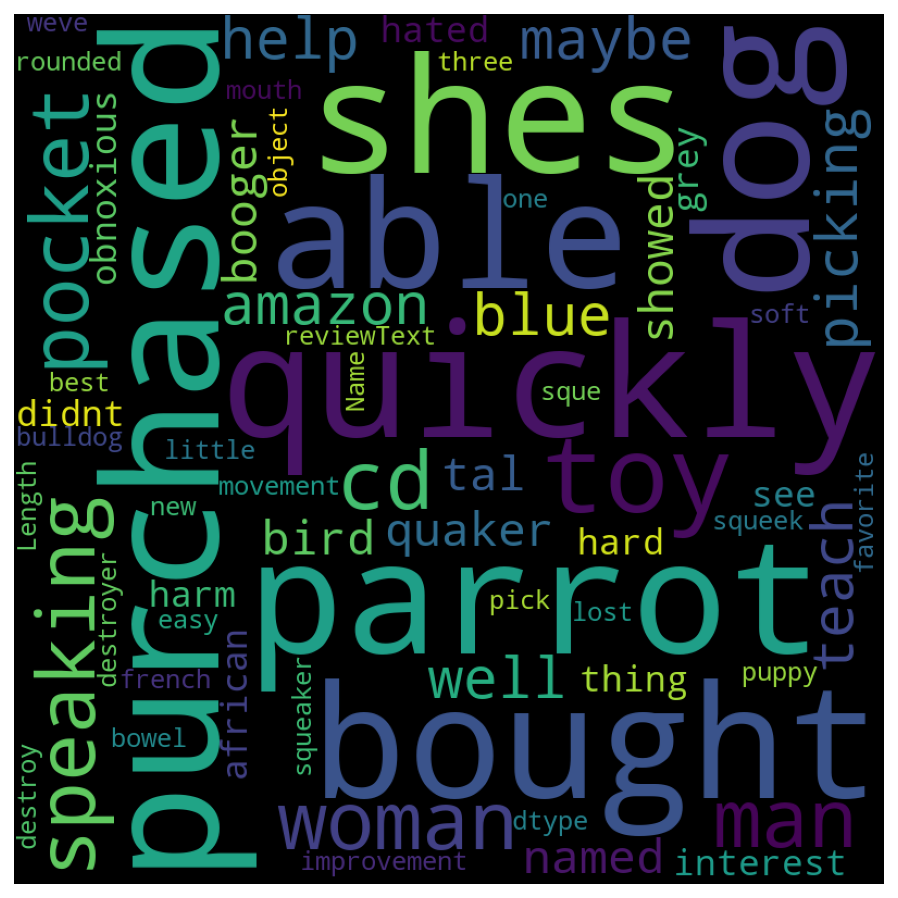

In [103]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(df_final['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [106]:
verified = verified.astype({"reviewText": str, "summary": str})

In [107]:
not_verified = not_verified.astype({"reviewText": str, "summary": str})

In [110]:
verified['reviewText'] = verified['reviewText'].apply(remove_punctuation)
verified.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Package Type:,style.Style:,style.Flavor Name:,style.Style Name:,style.Wattage:,style.Flavor:,style.Package Quantity:,style.Item Package Quantity:,style.Scent:,style.Item Shape:
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot It ha...,It's okay,1480636800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,Maybe its just my Amazon parrot but shes not p...,It might work for a different bird,1476662400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it,Three Stars,1472601600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didnt do a thing for my African Grey He hated ...,He hated it and it was very obnoxious,1471478400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,True,"07 17, 2016",A20M3TKXKB1M1T,0972585419,ocean girl,I like it but the Cockatiel I am not so sure ...,I like it - but the Cockatiel I am not so ...,1468713600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,This is a CD I should have read better I was e...,"I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,True,"03 27, 2015",A1SR90QMEF7G5D,0972585419,Christina Lyn DeSantis,my parot loves this CD started repeating the p...,Five Stars,1427414400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,True,"03 4, 2015",A39RBE0IAAUCYN,0972585419,D,Good,Five Stars,1425427200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,True,"01 13, 2015",ALF0MRD3LRTPN,0972585419,Helen Sick,I was reLly disappointed the cd has a lot of s...,I was reLly disappointed the cd has a lot of s...,1421107200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/TheUnit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

AttributeError: 'function' object has no attribute 'words'

In [116]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

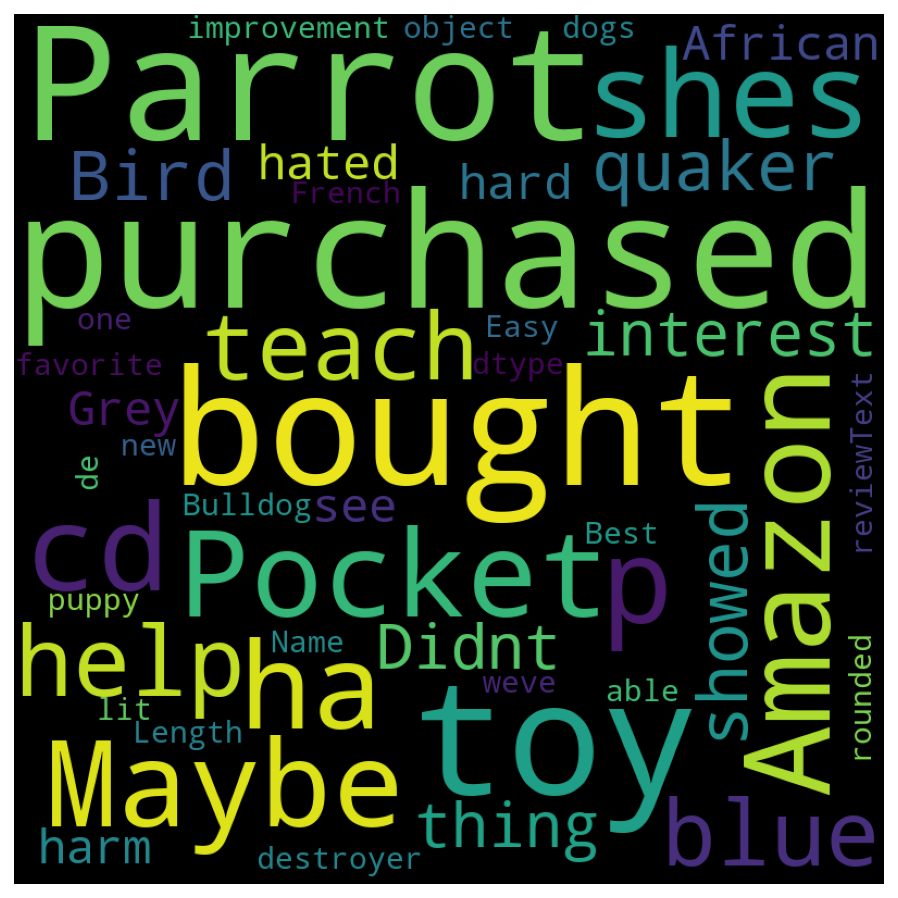

In [117]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(verified['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

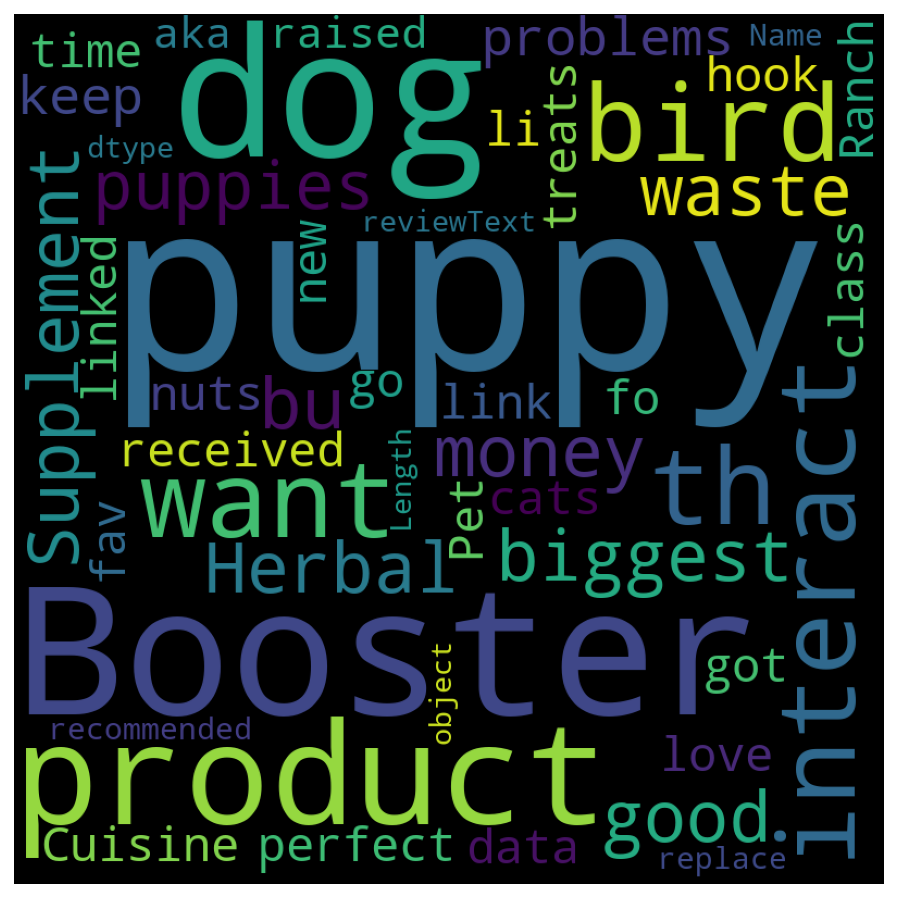

In [118]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = sw, max_words = 1000
                      , min_font_size = 20).generate(str(not_verified['reviewText']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [119]:
verified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929042 entries, 0 to 2098324
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [122]:
df_years = df_final[(df_final["reviewTime"] >= '01 01,2013') & (df_final["reviewTime"] >= '12 31,2017')]
df_years

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,style.Material:,style.Item Shape:,style.Scent Name:,style.Length:,style.Size Name:,style.Product Packaging:,style.Item Display Weight:,style.Number of Items:,style.Model Number:,style.Color Name:
6,3.0,NaN,True,"12 4, 2015",A2C26KQVC1SMHZ,0972585419,Amazon Customer,cd read better expecting dvd,"I should have read better, I was expecting a DVD",1449187200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,5.0,NaN,True,"12 8, 2014",A2UX7M4R0CTVWV,1417084871,juicer4life,huge cesar fan worth every penny godsend,Five Stars,1417996800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,5.0,NaN,True,"12 9, 2016",A1RYJSLJ4OM63M,1612231977,A Reader,delivered advertised works great price little ...,Genuine Replacement,1481241600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,4.0,NaN,True,"12 6, 2016",A2VH6M0C2TYT49,1612231977,NC Educator,great work,Effective traps,1480982400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,5.0,NaN,True,"12 5, 2016",A229P66A85POY4,1612231977,Privacy is nice,solid metal exception nozzle rubber grip grip ...,"solid metal, looks good.",1480896000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097819,3.0,NaN,True,"12 5, 2017",A25K3MO12CJ5IP,B01H574TWA,Jeannette L McManus,good gsd destroyed quickly,Three Stars,1512432000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098061,5.0,NaN,True,"12 6, 2016",A3S9F3WJOPY57H,B01HDQRL2S,Wayne O,gets rid odor laundry damp towels good product,Product I don't like to be without,1480982400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098078,5.0,NaN,True,"12 4, 2016",AT5PO6UL1DXN4,B01HDXHTBO,Kenike,fresh hay happy bunny,Small Pet Select Sells Bunny Approved Hay,1480809600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098130,5.0,NaN,True,"12 5, 2017",A1QT7ERSBWBHAE,B01HEZBK2U,jazzlegasp,thing cat eat,the only thing my cat will eat,1512432000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_years.to_csv(r'/Users/TheUnit/Desktop/years.csv')

In [141]:
df_years.groupby('reviewerID')['asin'].value_counts(ascending=False)

reviewerID            asin      
A0103047AS0C8QKUI0X2  B001AT9H40    1
A0436342QLT4257JODYJ  B00474A3DY    1
A0611551KU79JNSC7JJV  B00DJRCTLY    1
                      B00IK5SEBO    1
A10081HF1GFIOP        B000084EEF    1
                                   ..
AZZRRYBQG57LF         B0002DK26C    1
                      B0002I0RN0    1
                      B000633Y4A    1
                      B005B3LB2C    1
AZZZY1W55XHZR         B00134FQZQ    2
Name: asin, Length: 36523, dtype: int64

In [144]:
df_years['asin'].value_counts(ascending=False)

B000W5QSYA    314
B0012NV9NQ    202
B0013MVJPY    202
B000OX89XI    117
B0009YD8OC    112
             ... 
B00AU0TKH4      1
B0002I0QMM      1
B00CCI3ZGO      1
B00M523QB6      1
B000GJ2K9Y      1
Name: asin, Length: 13807, dtype: int64

In [147]:
df_years['asin'].value_counts(ascending=False).loc[lambda x : x>50]

B000W5QSYA    314
B0012NV9NQ    202
B0013MVJPY    202
B000OX89XI    117
B0009YD8OC    112
B0014HLF48    102
B001A5IXRG    101
B0002I0O5G     96
B00176CT5U     96
B0002DHXX2     87
B000VTRI32     66
B005AP3B8S     65
B00164YL22     64
B000BQN9LA     63
B00CPDWT2M     63
B01E7NPFXC     60
B000XY7C7C     60
B000084EEF     60
B0002AR15U     56
B0002H3ZLM     56
B007RBB4XW     55
B0010P0YSW     54
B0007A0AQW     53
B000UGB9EA     53
B000634MH8     51
B008PNN8DK     51
Name: asin, dtype: int64

In [153]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 35 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   overall                       float64
 1   vote                          object 
 2   verified                      bool   
 3   reviewTime                    object 
 4   reviewerID                    object 
 5   asin                          object 
 6   reviewerName                  object 
 7   reviewText                    object 
 8   summary                       object 
 9   unixReviewTime                int64  
 10  style.Format:                 object 
 11  style.Color:                  object 
 12  image                         object 
 13  style.Size:                   object 
 14  style.Pattern:                object 
 15  style.Design:                 object 
 16  style.Package Type:           object 
 17  style.Style:                  object 
 18  style.Flavor Name:    

In [159]:
df_final['positive'] = df_final['overall'].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
df_final['negative'] = df_final['overall'].apply(lambda x: 1 if x <= 2 else 0)